In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2023-11-28 04:32:41.015901: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
from tensorflow.keras.preprocessing.image import load_img

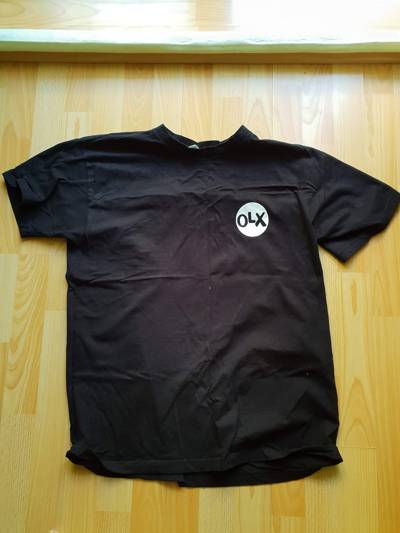

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-28 04:34:19.848234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 04:34:19.854576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 04:34:19.855136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 04:34:19.855928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

2023-11-28 04:35:16.014332: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-28 04:35:16.630735: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-28 04:35:16.631161: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-28 04:35:16.631222: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-28 04:35:16.631776: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-28 04:35:16.631865: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 2s 2s/step


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 20,881,970
Trainable params: 20,490
Non-trainable params: 20,861,480
_________________________________________________________________


In [26]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 18s 156ms/step - loss: 1.3348 - accuracy: 0.6561 - val_loss: 0.9559 - val_accuracy: 0.7361
Epoch 2/10
96/96 [==============================] - 11s 115ms/step - loss: 0.5834 - accuracy: 0.8246 - val_loss: 0.8159 - val_accuracy: 0.7683
Epoch 3/10
96/96 [==============================] - 11s 115ms/step - loss: 0.3667 - accuracy: 0.8706 - val_loss: 0.8397 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 11s 115ms/step - loss: 0.2377 - accuracy: 0.9172 - val_loss: 0.8830 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.1987 - accuracy: 0.9335 - val_loss: 0.9835 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 11s 115ms/step - loss: 0.1312 - accuracy: 0.9557 - val_loss: 0.7952 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 11s 116ms/step - loss: 0.0975 - accuracy: 0.9668 - val_loss: 0.8884 - val_accuracy: 0.8035

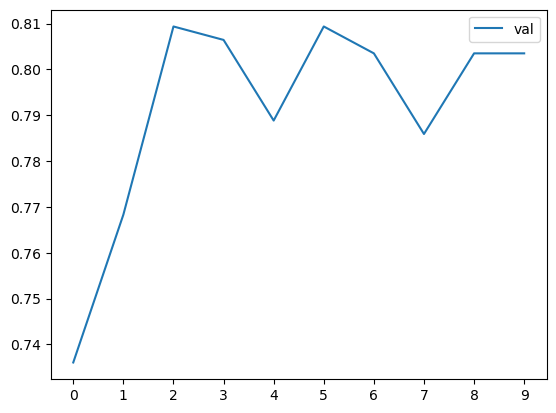

In [29]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [30]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [31]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 14s 124ms/step - loss: 1.9577 - accuracy: 0.3422 - val_loss: 1.6048 - val_accuracy: 0.5015
Epoch 2/10
96/96 [==============================] - 11s 117ms/step - loss: 1.3982 - accuracy: 0.5531 - val_loss: 1.2511 - val_accuracy: 0.6012
Epoch 3/10
96/96 [==============================] - 11s 115ms/step - loss: 1.1530 - accuracy: 0.6310 - val_loss: 1.0730 - val_accuracy: 0.6686
Epoch 4/10
96/96 [==============================] - 11s 114ms/step - loss: 1.0118 - accuracy: 0.6838 - val_loss: 0.9636 - val_accuracy: 0.6862
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.9193 - accuracy: 0.7119 - val_loss: 0.8899 - val_accuracy: 0.7126
Epoch 6/10
96/96 [==============================] - 11s 113ms/step - loss: 0.8505 - accuracy: 0.7291 - val_loss: 0.8370 - val_accuracy: 0.7449
Epoch 7/10
96/96 [==============================] - 11s 113ms/step - loss: 0.7982 - accuracy: 0.7461 - val_loss: 0.7968 - val_accuracy:

In [33]:
# del scores[0.1]
# del scores[0.0001]

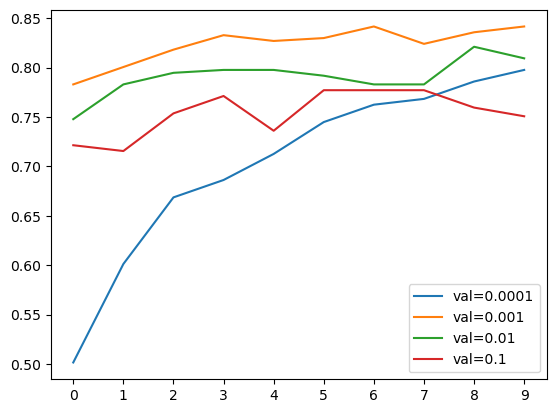

In [34]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [36]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [37]:
model.save_weights('model_v1.h5', save_format='h5')

In [38]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [39]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 129ms/step - loss: 1.0864 - accuracy: 0.6340 - val_loss: 0.7276 - val_accuracy: 0.7742
Epoch 2/10
96/96 [==============================] - 11s 114ms/step - loss: 0.6270 - accuracy: 0.7885 - val_loss: 0.6943 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 11s 118ms/step - loss: 0.5096 - accuracy: 0.8321 - val_loss: 0.5954 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 11s 118ms/step - loss: 0.4329 - accuracy: 0.8628 - val_loss: 0.5809 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 11s 117ms/step - loss: 0.3683 - accuracy: 0.8937 - val_loss: 0.5590 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 11s 114ms/step - loss: 0.3233 - accuracy: 0.9110 - val_loss: 0.5425 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.2877 - accuracy: 0.9247 - val_loss: 0.5526 - val_accuracy: 0.8094

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [40]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [41]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 14s 123ms/step - loss: 1.4054 - accuracy: 0.5196 - val_loss: 0.8812 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 11s 114ms/step - loss: 0.8222 - accuracy: 0.7226 - val_loss: 0.7276 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 11s 115ms/step - loss: 0.6446 - accuracy: 0.7823 - val_loss: 0.6244 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 11s 115ms/step - loss: 0.5346 - accuracy: 0.8256 - val_loss: 0.5927 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 11s 115ms/step - loss: 0.4640 - accuracy: 0.8465 - val_loss: 0.5665 - val_accuracy: 0.8299
Epoch 6/10
96/96 [==============================] - 11s 116ms/step - loss: 0.3966 - accuracy: 0.8735 - val_loss: 0.5670 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 11s 114ms/step - loss: 0.3513 - accuracy: 0.8875 - val_loss: 0.5318 - val_accuracy: 0.8

In [44]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 1000)              2049000   
                                                                 
 dense_11 (Dense)            (None, 10)                10010     
                                                                 
Total params: 22,920,490
Trainable params: 2,059,010
Non-trainable params: 20,861,480
_______________________________________

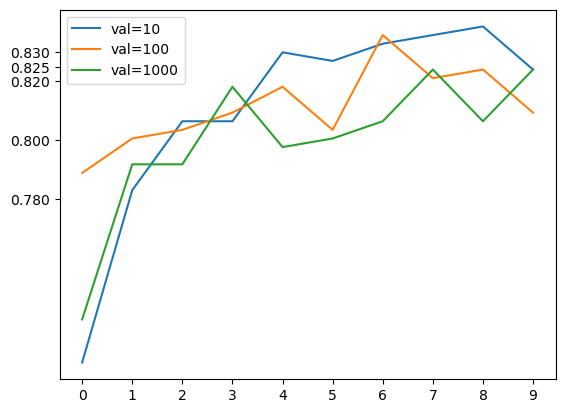

In [45]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [46]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [47]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 14s 124ms/step - loss: 0.9446 - accuracy: 0.6835 - val_loss: 0.6244 - val_accuracy: 0.7977
Epoch 2/30
96/96 [==============================] - 11s 115ms/step - loss: 0.5002 - accuracy: 0.8266 - val_loss: 0.5552 - val_accuracy: 0.8270
Epoch 3/30
96/96 [==============================] - 11s 114ms/step - loss: 0.3498 - accuracy: 0.8810 - val_loss: 0.6052 - val_accuracy: 0.7801
Epoch 4/30
96/96 [==============================] - 11s 114ms/step - loss: 0.2525 - accuracy: 0.9244 - val_loss: 0.5842 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 11s 115ms/step - loss: 0.1663 - accuracy: 0.9553 - val_loss: 0.5757 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 11s 115ms/step - loss: 0.1179 - accuracy: 0.9749 - val_loss: 0.5976 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 11s 115ms/step - loss: 0.0817 - accuracy: 0.9857 - val_loss: 0.5959 - val_accuracy: 0.

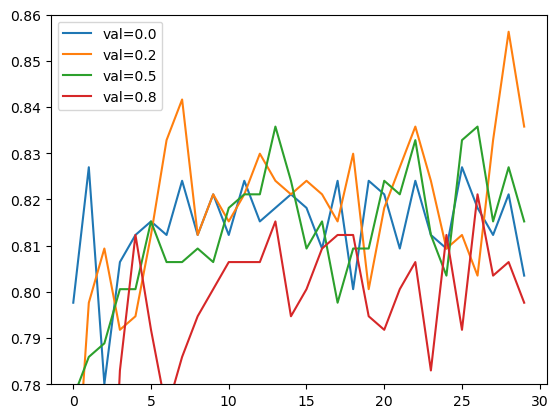

In [48]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

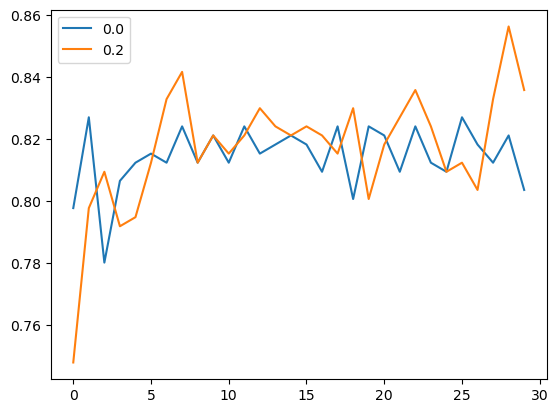

In [49]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [50]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3069 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 15s 131ms/step - loss: 1.0524 - accuracy: 0.6445 - val_loss: 0.6932 - val_accuracy: 0.8006
Epoch 2/50
96/96 [==============================] - 11s 115ms/step - loss: 0.6294 - accuracy: 0.7807 - val_loss: 0.6149 - val_accuracy: 0.8065
Epoch 3/50
96/96 [==============================] - 11s 115ms/step - loss: 0.4620 - accuracy: 0.8397 - val_loss: 0.5928 - val_accuracy: 0.8035
Epoch 4/50
96/96 [==============================] - 11s 114ms/step - loss: 0.3478 - accuracy: 0.8860 - val_loss: 0.5657 - val_accuracy: 0.8270
Epoch 5/50
96/96 [==============================] - 11s 115ms/step - loss: 0.2791 - accuracy: 0.9088 - val_loss: 0.5338 - val_accuracy: 0.8387
Epoch 6/50
96/96 [==============================] - 11s 113ms/step - loss: 0.2346 - accuracy: 0.9273 - val_loss: 0.5544 - val_accuracy: 0.8328
Epoch 7/50
96/96 [==============================] - 11s 114ms/step - loss: 0.1839 - accuracy: 0.9436 - val_loss: 0.6227 - val_accuracy: 0.8123

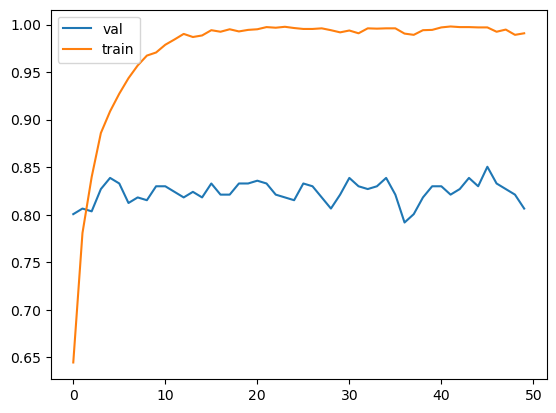

In [52]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [53]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [54]:
input_size = 299

In [55]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3069 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [56]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [57]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 70s 697ms/step - loss: 0.9911 - accuracy: 0.6895 - val_loss: 0.5524 - val_accuracy: 0.8299
Epoch 2/50
96/96 [==============================] - 65s 671ms/step - loss: 0.5304 - accuracy: 0.8227 - val_loss: 0.4517 - val_accuracy: 0.8592
Epoch 3/50
96/96 [==============================] - 65s 672ms/step - loss: 0.4322 - accuracy: 0.8508 - val_loss: 0.4114 - val_accuracy: 0.8651
Epoch 4/50
96/96 [==============================] - 64s 669ms/step - loss: 0.3881 - accuracy: 0.8641 - val_loss: 0.4059 - val_accuracy: 0.8504
Epoch 5/50
96/96 [==============================] - 64s 668ms/step - loss: 0.3636 - accuracy: 0.8781 - val_loss: 0.4001 - val_accuracy: 0.8534
Epoch 6/50
96/96 [==============================] - 65s 672ms/step - loss: 0.1056 - accuracy: 0.9655 - val_loss: 0.3711 - val_accuracy: 0.8739
Epoch 27/50
96/96 [==============================] - 64s 670ms/step - loss: 0.1107 - accuracy: 0.9655 - val_loss: 0.3484 - val_accuracy: 0.876

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [60]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [61]:
model = keras.models.load_model('xception_v4_1_34_0.900.h5')

In [62]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 279ms/step - loss: 0.2552 - accuracy: 0.8978


[0.2552347779273987, 0.897849440574646]

In [63]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [64]:
img = load_img(path, target_size=(299, 299))

In [65]:
import numpy as np

In [66]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [67]:
X = preprocess_input(X)

In [68]:
pred = model.predict(X)

1/1 [==============================] - 1s 652ms/step


In [69]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [70]:
dict(zip(classes, pred[0]))

{'dress': -3.5000713,
 'hat': -5.345682,
 'longsleeve': -2.0689847,
 'outwear': -2.5691068,
 'pants': 11.894016,
 'shirt': -4.884064,
 'shoes': -4.22394,
 'shorts': 3.3540032,
 'skirt': -5.410091,
 't-shirt': -3.516479}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

